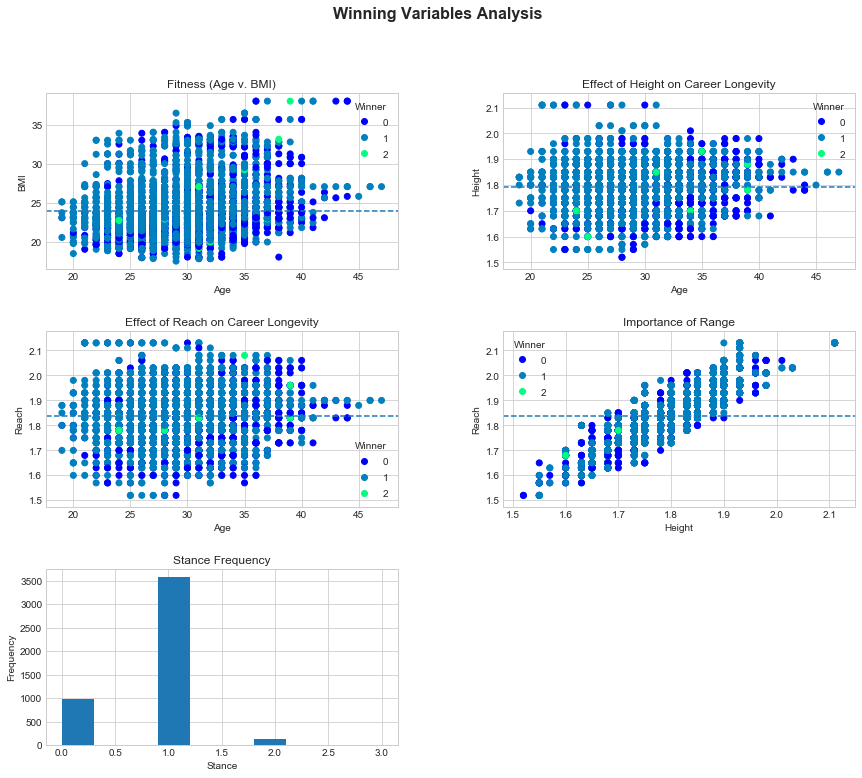

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

################ Data Preparation ################

f = pd.read_csv('C:/Users/xavie/Downloads/UFC_data/data.csv')


red = pd.DataFrame(f, columns = ['R_fighter', 'Winner', 'R_Stance',
                                 'R_Height_cms', 'R_Reach_cms',
                                 'R_Weight_lbs', 'R_age'])
red = red.dropna()

# Winner: win = 1, loss = 0, draw = 2 (remove draw?)
red['Winner'] = red['Winner'].replace({'Red': 1,
                                       'Blue': 0,
                                       'Draw': 2}).astype(int)

# Stance: Orthodox = 1, Southpaw = 0, Switch = 2, Open Stance = 3
red['R_Stance'] = red['R_Stance'].replace({'Orthodox': 1,
                                           'Southpaw': 0,
                                           'Switch': 2,
                                           'Open Stance': 3}).astype(int)

# Height and Reach: cms to m
red['R_Height_m'] = red['R_Height_cms'] / 100
red['R_Reach_m'] = red['R_Reach_cms'] / 100

# Weight: lbs to kg
red['R_Weight_kg'] = red['R_Weight_lbs'] * 0.453592

# Remove unwanted columns
red = red.drop(columns = ['R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs'])

# BMI: weight/ height^2
red['R_bmi'] = red['R_Weight_kg'] / (red['R_Height_m'] ** 2)

# Round decimals to hundredths
red = red.round(2)


################ Visualization ################

# Change style
plt.style.use('seaborn-whitegrid')

# Subplots of stance (hist/ bar vs wins), age, height, reach, weight, bmi
fig, ax = plt.subplots(nrows = 3,
                       ncols = 2,
                       figsize = (14.5, 12))


# Add data to ax0
scatter = ax[0, 0].scatter(x = red['R_age'],
                      y = red['R_bmi'],
                      c = red['Winner'],
                      cmap = 'winter')
# Customize ax0
ax[0, 0].set(title = 'Fitness (Age v. BMI)',
        xlabel = 'Age',
        ylabel = 'BMI');
# Add a legend to ax0
ax[0, 0].legend(*scatter.legend_elements(), title = 'Winner')
# Add a meanline
ax[0, 0].axhline(y = red['R_bmi'].mean(),
            linestyle = '--');


# Add data to ax1
scatter = ax[0, 1].scatter(x = red['R_age'],
                      y = red['R_Height_m'],
                      c = red['Winner'],
                      cmap = 'winter')
# Customize ax1
ax[0, 1].set(title = 'Effect of Height on Career Longevity',
        xlabel = 'Age',
        ylabel = 'Height')
# Add a legend to ax1
ax[0, 1].legend(*scatter.legend_elements(), title = 'Winner')
# Add a meanline
ax[0, 1].axhline(y = red['R_Height_m'].mean(),
            linestyle = '--');


# Add data to ax2
scatter = ax[1, 0].scatter(x = red['R_age'],
                      y = red['R_Reach_m'],
                      c = red['Winner'],
                      cmap = 'winter')
# Customize ax2
ax[1, 0].set(title = 'Effect of Reach on Career Longevity',
        xlabel = 'Age',
        ylabel = 'Reach')
# Add a legend to ax1
ax[1, 0].legend(*scatter.legend_elements(), title = 'Winner')
# Add a meanline
ax[1, 0].axhline(y = red['R_Reach_m'].mean(),
           linestyle = '--');


# Add data to ax3
scatter = ax[1, 1].scatter(x = red['R_Height_m'],
                      y = red['R_Reach_m'],
                      c = red['Winner'],
                      cmap = 'winter')
# Customize ax3
ax[1, 1].set(title = 'Importance of Range',
        xlabel = 'Height',
        ylabel = 'Reach')
# Add a legend to ax3
ax[1, 1].legend(*scatter.legend_elements(), title = 'Winner')
# Add a meanline
ax[1, 1].axhline(y = red['R_Reach_m'].mean(),
            linestyle = '--');

# Add data to ax4
ax[2, 0].hist(red['R_Stance']);

ax[2, 0].set(title = 'Stance Frequency',
             xlabel = 'Stance',
             ylabel = 'Frequency')

# Removes the empty plot, for uneven subplots amount in a figure
fig.delaxes(ax = ax[2, 1])

# Add a title to the figure
fig.suptitle("Winning Variables Analysis",
             fontsize = 16,
             fontweight = "bold");

# Create space between subplots
fig.subplots_adjust(hspace = 0.35, wspace = 0.3)